In [274]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split # Splitting into train and test
from sklearn import tree
from sklearn import ensemble
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, classification_report, confusion_matrix

from sklearn.feature_selection import SelectFromModel

from sklearn.ensemble import RandomForestClassifier #RandomForest Model


from sklearn.model_selection import GridSearchCV# Hyperparameter Tuning
from sklearn.model_selection import cross_val_score#cross validation score

from sklearn.metrics import classification_report # text report showing the main classification metrics
from sklearn.metrics import confusion_matrix #to get confusion_matirx 


In [275]:
data = pd.read_csv('cardio_output.csv')

In [276]:
data.head()

,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,...,height_new,age_group,bp_difference,bmi_squared,age_cholesterol_interaction,weight_height_interaction,weight_status,bp_category,alco_smoke_interaction,activity_interaction
0,2,168,62.0,110,80,1,1,0,0,1,...,1.68,Middle-aged,30,482.6809,50,10416.0,Normal,Normal,0,2
1,1,156,85.0,140,90,3,1,0,0,1,...,1.56,Middle-aged,50,1220.1049,165,13260.0,Obese,High,0,4
2,1,165,64.0,130,70,3,1,0,0,0,...,1.65,Middle-aged,60,552.7201,153,10560.0,Normal,Elevated,0,0
3,2,169,82.0,150,100,1,1,0,0,1,...,1.69,Middle-aged,50,824.2641,48,13858.0,Overweight,High,0,2
4,1,156,56.0,100,60,1,1,0,0,0,...,1.56,Middle-aged,40,529.4601,47,8736.0,Normal,Normal,0,0


In [277]:
data.select_dtypes(exclude='object').corr()

,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,...,age_years,bmi,pressure,height_new,bp_difference,bmi_squared,age_cholesterol_interaction,weight_height_interaction,alco_smoke_interaction,activity_interaction
gender,1.000000,0.501682,0.128853,0.044074,0.048948,-0.041988,-0.023834,0.336901,0.167548,0.007145,...,-0.024546,-0.139008,0.049567,0.501682,0.020366,-0.144632,-0.044646,0.243344,0.318788,0.060299
height,0.501682,1.000000,0.248424,-0.010920,0.007384,-0.069359,-0.030193,0.184898,0.087998,-0.005392,...,-0.082335,-0.278251,-0.004389,1.000000,-0.021171,-0.282196,-0.084668,0.470717,0.172829,0.002825
weight,0.128853,0.248424,1.000000,0.231156,0.210789,0.129277,0.087519,0.055654,0.057237,-0.011883,...,0.063234,0.858026,0.241387,0.248424,0.144768,0.846665,0.134297,0.970743,0.068563,0.080950
ap_hi,0.044074,-0.010920,0.231156,1.000000,0.695846,0.187110,0.082815,0.020408,0.023518,0.003141,...,0.203703,0.233784,0.956873,-0.010920,0.804820,0.229213,0.218037,0.208069,0.026503,0.107160
ap_lo,0.048948,0.007384,0.210789,0.695846,1.000000,0.146735,0.061298,0.018055,0.025976,0.000945,...,0.146188,0.203971,0.874476,0.007384,0.133772,0.199089,0.166544,0.194091,0.026228,0.083573
cholesterol,-0.041988,-0.069359,0.129277,0.187110,0.146735,1.000000,0.454186,0.004335,0.025463,0.007739,...,0.151692,0.164283,0.185729,-0.069359,0.136926,0.163536,0.969454,0.100854,0.016641,0.512223
gluc,-0.023834,-0.030193,0.087519,0.082815,0.061298,0.454186,1.000000,-0.010005,0.003580,-0.007076,...,0.096287,0.102259,0.080728,-0.030193,0.063617,0.101679,0.446343,0.072370,-0.004864,0.461133
smoke,0.336901,0.184898,0.055654,0.020408,0.018055,0.004335,-0.010005,1.000000,0.342305,0.026567,...,-0.047309,-0.042550,0.021087,0.184898,0.013240,-0.043712,-0.006796,0.097073,0.862839,0.217310
alco,0.167548,0.087998,0.057237,0.023518,0.025976,0.025463,0.003580,0.342305,1.000000,0.025556,...,-0.028254,0.009954,0.026391,0.087998,0.010985,0.009033,0.017034,0.074440,0.770296,0.209272
active,0.007145,-0.005392,-0.011883,0.003141,0.000945,0.007739,-0.007076,0.026567,0.025556,1.000000,...,-0.011984,-0.009477,0.002504,-0.005392,0.003554,-0.010355,0.004630,-0.011849,0.031779,0.726290


In [278]:
data.select_dtypes(exclude='object').describe()

,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,...,age_years,bmi,pressure,height_new,bp_difference,bmi_squared,age_cholesterol_interaction,weight_height_interaction,alco_smoke_interaction,activity_interaction
count,60132.000000,60132.000000,60132.000000,60132.000000,60132.000000,60132.000000,60132.000000,60132.000000,60132.000000,60132.000000,...,60132.000000,60132.000000,60132.000000,60132.000000,60132.000000,60132.000000,60132.000000,60132.000000,60132.000000,60132.000000
mean,1.347303,164.555245,73.425961,125.764452,81.045051,1.350911,1.220232,0.085595,0.051869,0.803665,...,52.802435,27.170240,206.809502,1.645552,44.719401,757.620564,72.016813,12102.335635,0.137464,2.182482
std,0.476117,6.830490,11.615004,13.754923,8.237845,0.670020,0.567630,0.279767,0.221765,0.397228,...,6.743794,4.404421,20.365509,0.068305,9.968251,256.682966,39.215587,2094.498723,0.412219,1.485270
min,1.000000,150.000000,52.000000,100.000000,60.000000,1.000000,1.000000,0.000000,0.000000,0.000000,...,29.000000,16.050000,160.000000,1.500000,0.000000,257.602500,29.000000,7800.000000,0.000000,0.000000
25%,1.000000,160.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,...,48.000000,23.880000,200.000000,1.600000,40.000000,570.254400,49.000000,10560.000000,0.000000,2.000000
50%,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,...,53.000000,26.260000,200.000000,1.650000,40.000000,689.587600,56.000000,11856.000000,0.000000,2.000000
75%,2.000000,169.000000,80.000000,135.000000,90.000000,1.000000,1.000000,0.000000,0.000000,1.000000,...,58.000000,29.750000,220.000000,1.690000,50.000000,885.062500,64.000000,13440.000000,0.000000,3.000000
max,2.000000,180.000000,106.000000,160.000000,100.000000,3.000000,3.000000,1.000000,1.000000,1.000000,...,64.000000,46.670000,260.000000,1.800000,100.000000,2178.088900,192.000000,19080.000000,2.000000,8.000000


In [279]:
data['age_group'].value_counts()

age_group
Middle-aged    48898
Senior          8345
Young           2886
Name: count, dtype: int64

In [280]:
data['age_group'] = data['age_group'].replace('Young', 0)
data['age_group'] = data['age_group'].replace('Middle-aged', 1)
data['age_group'] = data['age_group'].replace('Senior', 2)

In [281]:
data['weight_status'].value_counts()

weight_status
Overweight     23595
Normal         21768
Obese          14642
Underweight      127
Name: count, dtype: int64

In [282]:
data['weight_status'] = data['weight_status'].replace('Underweight', 0)
data['weight_status'] = data['weight_status'].replace('Normal', 1)
data['weight_status'] = data['weight_status'].replace('Overweight', 2)
data['weight_status'] = data['weight_status'].replace('Obese', 3)

In [283]:
data['bp_category'].value_counts()

bp_category
Elevated    34780
High        14899
Normal      10453
Name: count, dtype: int64

In [284]:
data['bp_category'] = data['bp_category'].replace('Normal', 0)
data['bp_category'] = data['bp_category'].replace('Elevated', 1)
data['bp_category'] = data['bp_category'].replace('High', 2)

In [285]:
data.corr()

,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,...,height_new,age_group,bp_difference,bmi_squared,age_cholesterol_interaction,weight_height_interaction,weight_status,bp_category,alco_smoke_interaction,activity_interaction
gender,1.000000,0.501682,0.128853,0.044074,0.048948,-0.041988,-0.023834,0.336901,0.167548,0.007145,...,0.501682,0.017036,0.020366,-0.144632,-0.044646,0.243344,-0.102948,0.050945,0.318788,0.060299
height,0.501682,1.000000,0.248424,-0.010920,0.007384,-0.069359,-0.030193,0.184898,0.087998,-0.005392,...,1.000000,-0.049481,-0.021171,-0.282196,-0.084668,0.470717,-0.223233,0.012377,0.172829,0.002825
weight,0.128853,0.248424,1.000000,0.231156,0.210789,0.129277,0.087519,0.055654,0.057237,-0.011883,...,0.248424,0.053377,0.144768,0.846665,0.134297,0.970743,0.792086,0.207105,0.068563,0.080950
ap_hi,0.044074,-0.010920,0.231156,1.000000,0.695846,0.187110,0.082815,0.020408,0.023518,0.003141,...,-0.010920,0.155110,0.804820,0.229213,0.218037,0.208069,0.219035,0.909569,0.026503,0.107160
ap_lo,0.048948,0.007384,0.210789,0.695846,1.000000,0.146735,0.061298,0.018055,0.025976,0.000945,...,0.007384,0.103598,0.133772,0.199089,0.166544,0.194091,0.191861,0.674476,0.026228,0.083573
cholesterol,-0.041988,-0.069359,0.129277,0.187110,0.146735,1.000000,0.454186,0.004335,0.025463,0.007739,...,-0.069359,0.110630,0.136926,0.163536,0.969454,0.100854,0.151952,0.160670,0.016641,0.512223
gluc,-0.023834,-0.030193,0.087519,0.082815,0.061298,0.454186,1.000000,-0.010005,0.003580,-0.007076,...,-0.030193,0.061066,0.063617,0.101679,0.446343,0.072370,0.094998,0.074249,-0.004864,0.461133
smoke,0.336901,0.184898,0.055654,0.020408,0.018055,0.004335,-0.010005,1.000000,0.342305,0.026567,...,0.184898,-0.022831,0.013240,-0.043712,-0.006796,0.097073,-0.022299,0.014139,0.862839,0.217310
alco,0.167548,0.087998,0.057237,0.023518,0.025976,0.025463,0.003580,0.342305,1.000000,0.025556,...,0.087998,-0.016358,0.010985,0.009033,0.017034,0.074440,0.018392,0.014460,0.770296,0.209272
active,0.007145,-0.005392,-0.011883,0.003141,0.000945,0.007739,-0.007076,0.026567,0.025556,1.000000,...,-0.005392,-0.006060,0.003554,-0.010355,0.004630,-0.011849,-0.005028,-0.003641,0.031779,0.726290


In [286]:
data = data.dropna()

In [287]:
scaler = MinMaxScaler()
data[['height', 'weight', 'ap_hi', 'ap_lo', 'height_new', 'bp_difference', 'bmi_squared',
       'age_cholesterol_interaction', 'weight_height_interaction',]] = scaler.fit_transform(data[['height', 'weight', 'ap_hi', 'ap_lo', 'height_new', 'bp_difference', 'bmi_squared',
       'age_cholesterol_interaction', 'weight_height_interaction',]])

In [288]:
X = data.drop('cardio', axis=1)
y = data['cardio']

In [289]:
X_train, X_test_val, y_train, y_test_val = train_test_split(X, y, train_size=0.7, random_state=42, stratify=y)
X_test, X_val, y_test, y_val = train_test_split(X_test_val, y_test_val, test_size=0.5, random_state=42, stratify=y_test_val)

### Random Forest Classifier

In [290]:
clf = ensemble.RandomForestClassifier(max_depth=5, random_state=42,)
clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, random_state=42)

In [291]:
clf.score(X,y)

0.7270202398177252

In [292]:
# Make prediction on the test set
y_test_pred = clf.predict(X_test)

# Generate a classification report for the test set
test_report = classification_report(y_test, y_test_pred)
print('Test classification report for Random Foorest Classifier:\n', test_report)


Test classification report for Random Foorest Classifier:
               precision    recall  f1-score   support

           0       0.70      0.83      0.76      4616
           1       0.78      0.63      0.70      4403

    accuracy                           0.73      9019
   macro avg       0.74      0.73      0.73      9019
weighted avg       0.74      0.73      0.73      9019



In [293]:
# Generate a confusion matrix for the test set
test_conf_matrix = confusion_matrix(y_test, y_test_pred)
print('Test confusion matrix for Random Foorest Classifier:\n', test_conf_matrix)

Test confusion matrix for Random Foorest Classifier:
 [[3809  807]
 [1620 2783]]


In [294]:
import matplotlib.pyplot as plt
import seaborn as sns

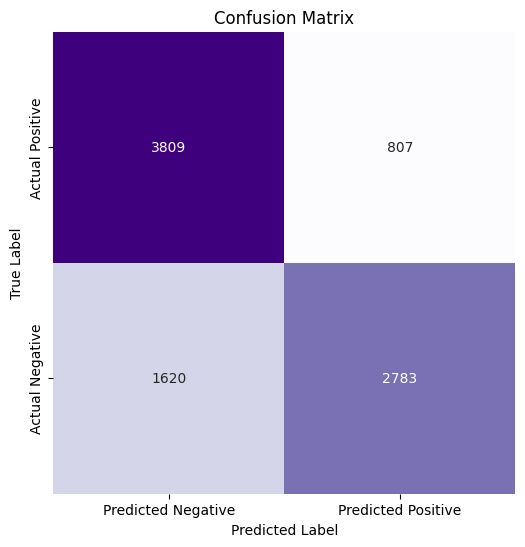

In [295]:
# Create a heatmap to visualize the confusion matrix
plt.figure(figsize=(6, 6))
sns.heatmap(test_conf_matrix, annot=True, fmt='d', cmap='Purples', cbar=False, square=True,
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Positive', 'Actual Negative'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

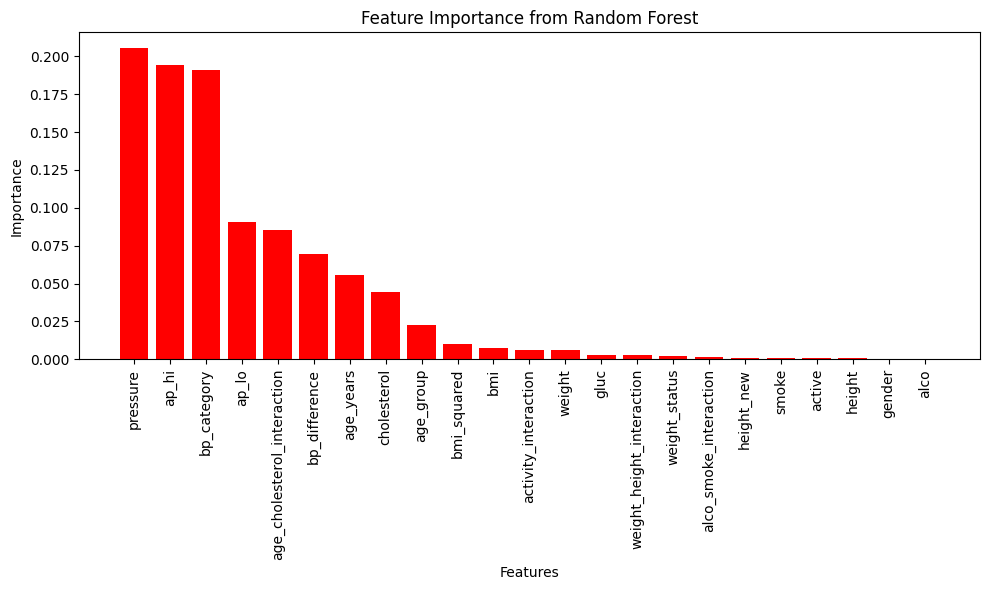

In [296]:
# Access feature importances
feature_importances = clf.feature_importances_

# Create a DataFrame to store the feature importances along with their corresponding feature names
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sort the DataFrame by importance in descending order
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances using a bar plot
plt.figure(figsize=(10, 6))
plt.bar(importance_df['Feature'], importance_df['Importance'], color='red')
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance from Random Forest')
plt.tight_layout()
plt.show()

In [297]:
X.columns

Index(['gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol', 'gluc',
       'smoke', 'alco', 'active', 'age_years', 'bmi', 'pressure', 'height_new',
       'age_group', 'bp_difference', 'bmi_squared',
       'age_cholesterol_interaction', 'weight_height_interaction',
       'weight_status', 'bp_category', 'alco_smoke_interaction',
       'activity_interaction'],
      dtype='object')

In [298]:
X = data[['pressure', 'ap_hi', 'ap_lo', 'age_cholesterol_interaction', 'bp_difference', 'age_years', 'cholesterol', 'age_group']]
y = data['cardio']

In [299]:
X_train, X_test_val, y_train, y_test_val = train_test_split(X, y, train_size=0.7, random_state=42, stratify=y)
X_test, X_val, y_test, y_val = train_test_split(X_test_val, y_test_val, test_size=0.5, random_state=42, stratify=y_test_val)

In [300]:
clf = ensemble.RandomForestClassifier(max_depth=7, random_state=42,)
clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=7, random_state=42)

In [301]:
# Make prediction on the test set
y_test_pred = clf.predict(X_test)

# Generate a classification report for the test set
test_report = classification_report(y_test, y_test_pred)
print('Test classification report for Random Foorest Classifier:\n', test_report)

Test classification report for Random Foorest Classifier:
               precision    recall  f1-score   support

           0       0.72      0.80      0.75      4616
           1       0.76      0.67      0.71      4403

    accuracy                           0.73      9019
   macro avg       0.74      0.73      0.73      9019
weighted avg       0.74      0.73      0.73      9019



In [302]:
# Generate a confusion matrix for the test set
test_conf_matrix = confusion_matrix(y_test, y_test_pred)
print('Test confusion matrix for Random Foorest Classifier:\n', test_conf_matrix)

Test confusion matrix for Random Foorest Classifier:
 [[3675  941]
 [1462 2941]]


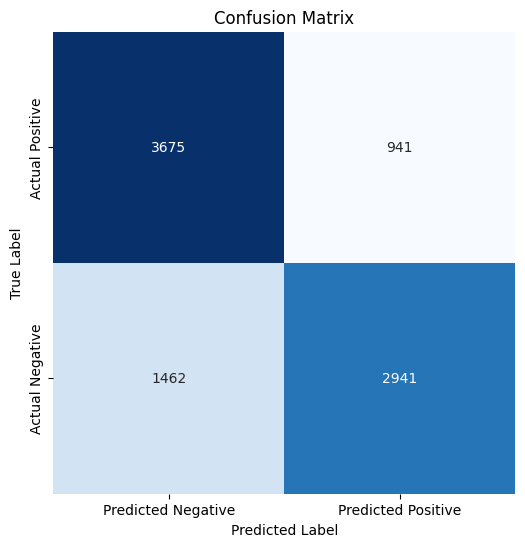

In [303]:
# Create a heatmap to visualize the confusion matrix
plt.figure(figsize=(6, 6))
sns.heatmap(test_conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, square=True,
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Positive', 'Actual Negative'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [304]:
y_val_pred = clf.predict(X_val)

# Generate a classification report for the test set
val_report = classification_report(y_val, y_val_pred)
print('Test classification report for Random Foorest Classifier:\n', test_report)

Test classification report for Random Foorest Classifier:
               precision    recall  f1-score   support

           0       0.72      0.80      0.75      4616
           1       0.76      0.67      0.71      4403

    accuracy                           0.73      9019
   macro avg       0.74      0.73      0.73      9019
weighted avg       0.74      0.73      0.73      9019



In [305]:
clf.score(X,y)

0.7274193816627584

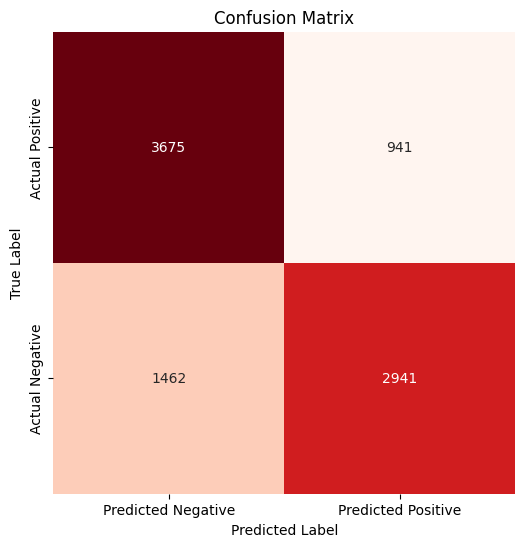

In [306]:
# Generate a confusion matrix for the test set
val_conf_matrix = confusion_matrix(y_val, y_val_pred)
# Create a heatmap to visualize the confusion matrix
plt.figure(figsize=(6, 6))
sns.heatmap(test_conf_matrix, annot=True, fmt='d', cmap='Reds', cbar=False, square=True,
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Positive', 'Actual Negative'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [307]:
params = { 
    'n_estimators': [10, 50, 100, 150, 200, 300, 400, 500],
    'max_depth' : [10,20,30,40,50],
    'criterion' : ['entropy','gini']
}


In [308]:
'''
rfc_gridcv = RandomForestClassifier(random_state=42)
rfc_gridcv = GridSearchCV(estimator=rfc_gridcv, param_grid=params, cv= 10, n_jobs = -1)
rfc_gridcv.fit(X_train, y_train)
print("Best Hyper Parameters:\n",rfc_gridcv.best_params_)
'''

'\nrfc_gridcv = RandomForestClassifier(random_state=42)\nrfc_gridcv = GridSearchCV(estimator=rfc_gridcv, param_grid=params, cv= 10, n_jobs = -1)\nrfc_gridcv.fit(X_train, y_train)\nprint("Best Hyper Parameters:\n",rfc_gridcv.best_params_)\n'

In [309]:
rfc = RandomForestClassifier(random_state=42, n_estimators=100, max_depth= 7, criterion = 'entropy')
rfc.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=7, random_state=42)

In [310]:
# Make prediction on the test set
y_test_pred = rfc.predict(X_test)

# Generate a classification report for the test set
test_report = classification_report(y_test, y_test_pred)
print('Test classification report for Random Foorest Classifier:\n', test_report)

Test classification report for Random Foorest Classifier:
               precision    recall  f1-score   support

           0       0.71      0.79      0.75      4616
           1       0.75      0.67      0.71      4403

    accuracy                           0.73      9019
   macro avg       0.73      0.73      0.73      9019
weighted avg       0.73      0.73      0.73      9019



In [311]:
rfc.score(X,y)

0.7268705616258377

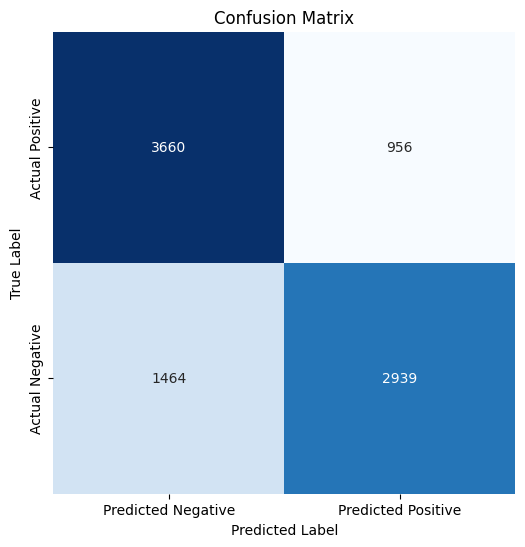

In [312]:
test_conf_matrix = confusion_matrix(y_test, y_test_pred)
# Create a heatmap to visualize the confusion matrix
plt.figure(figsize=(6, 6))
sns.heatmap(test_conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, square=True,
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Positive', 'Actual Negative'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [313]:
y_val_pred = rfc.predict(X_val)

# Generate a classification report for the test set
val_report = classification_report(y_val, y_val_pred)
print('Test classification report for Random Foorest Classifier:\n', test_report)

Test classification report for Random Foorest Classifier:
               precision    recall  f1-score   support

           0       0.71      0.79      0.75      4616
           1       0.75      0.67      0.71      4403

    accuracy                           0.73      9019
   macro avg       0.73      0.73      0.73      9019
weighted avg       0.73      0.73      0.73      9019



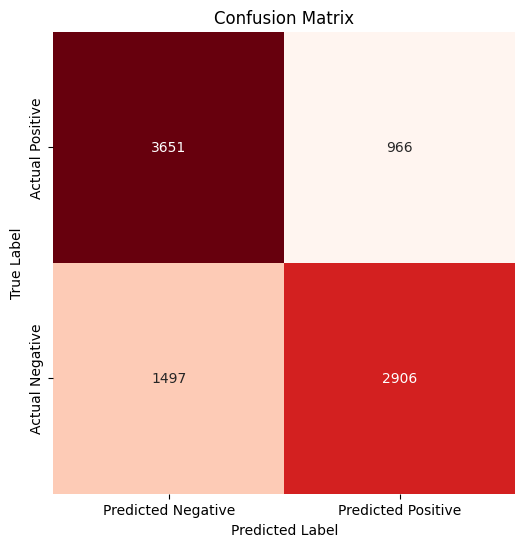

In [314]:
# Generate a confusion matrix for the test set
val_conf_matrix = confusion_matrix(y_val, y_val_pred)
# Create a heatmap to visualize the confusion matrix
plt.figure(figsize=(6, 6))
sns.heatmap(val_conf_matrix, annot=True, fmt='d', cmap='Reds', cbar=False, square=True,
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Positive', 'Actual Negative'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()